# `NumericalSgps` an introduction - SSC 2023

In [1]:
LoadPackage("num");

true

## Length based factorization invariants

Let $S$ be minimally generated by $\{n_1,\dots,n_e\}$. 
$$
\varphi_S:\mathbb{N}^e \to S, \varphi_S(e_i)=n_i.
$$

Recall that the set of factorizations of an element $s\in S$ is $\mathsf{Z}(s)=\varphi_S^{-1}(s)$, that is, 
$$ \mathsf{Z}(s)=\{ (a_1,\dots,a_e)\in \mathbb{N}^e : a_1n_1+\dots+a_en_e =s\}.$$

### Sets of lengths of factorizations

The length of a factorization $z=(z_1,\dots,z_e)$ is the number of minimal generators involved in it, that is, $|z|=z_1+\dots+z_e$. We define the set of lenghts of the factorizations of $s$ as 
$$ \mathsf{L}(s)= \{ |z| : z\in \mathsf{Z}(s)\}.$$

In [2]:
s:=NumericalSemigroup(3,5,7);;

In [3]:
Factorizations(10,s);

[ [ 0, 2, 0 ], [ 1, 0, 1 ] ]

In [4]:
LengthsOfFactorizationsElementWRTNumericalSemigroup(200,s);

[ 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66 ]

In [5]:
Length(Factorizations(200,s));

205

### Delta sets

One can arrange the lengths of the factorizations of an element $s$ in the following way $\mathsf{L}(s)=\{l_1<\dots<l_t\}$. The Delta set of $s$ is then defined as $\Delta(s)=\{l_2-l_1,l_3-l_2,\dots, l_t-l_{t-1}\}$. 

In [6]:
DeltaSet(200,s);

[ 2 ]

The Delta set of $S$ is the union of all the delta sets of its elements.

In [7]:
DeltaSet(s);

[ 2 ]

Recall that a minimal presentation of $s$ was 

In [9]:
rho:=MinimalPresentation(s);

[ [ [ 0, 0, 2 ], [ 3, 1, 0 ] ], [ [ 0, 1, 1 ], [ 4, 0, 0 ] ],   [ [ 0, 2, 0 ], [ 1, 0, 1 ] ] ]

And that one can "walk" from a factorization to any other factorization of the same element by using this minimal relations.

In [10]:
Set(rho, p->AbsInt(Sum(p[1]-p[2])));

[ 0, 2 ]

So it comes as no surprise that $\Delta(S)=\{2\}$. 
In fact, it is not difficult to prove $\min(\Delta(S))=\gcd\{ |a-b| : (a,b)\in \sigma\}$, with $\sigma$ any minimal presentation of $S$, and that $\max(\Delta(S))=\max\{\Delta(b) : b\in \operatorname{Betti}(S)\}$.

The idea behing the minimum is that any possible "jump" will be a linear combination of the "jumps" in the minimal relations. As for the maximum, "jumps" are preserved under translations, and thus the largest "jump" will be achieved between two factorizations with no commom support and in a Betti element.  

The structure of $\Delta(S)$ is very well known when $S$ has embedding dimension two or three, and even when it is generated by an arithmetice sequence.

In [11]:
s:=NumericalSemigroup(10,11,13,17);

<Numerical semigroup with 4 generators>

In [12]:
DeltaSet(s);

[ 1 ]

In [13]:
MinimalPresentation(s);

[ [ [ 0, 0, 0, 2 ], [ 1, 1, 1, 0 ] ], [ [ 0, 0, 1, 1 ], [ 3, 0, 0, 0 ] ],   [ [ 0, 0, 3, 0 ], [ 0, 2, 0, 1 ] ], [ [ 0, 1, 2, 0 ], [ 2, 0, 0, 1 ] ],   [ [ 0, 3, 0, 0 ], [ 2, 0, 1, 0 ] ] ]

In [14]:
BettiElements(s);

[ 30, 33, 34, 37, 39 ]

In [15]:
List(BettiElements(s),b->DeltaSet(b,s));

[ [ 1 ], [  ], [ 1 ], [  ], [  ] ]

### The elasticity

The elasticity of the factorizations of an element $s$ in a numerical semigroup $S$ is ratio between the largest length and smallest lenght of its factorizations, that is, 
$$
\rho(s)=\frac{\max(\mathsf{L}(s))}{\min(\mathsf{L}(s))}.
$$
The elasticity of the semigroup $S$ is defined as 
$$
\rho(S)=\sup\{ \rho(s) : s\in S\}.
$$

For numerical semigroups, this supremum becomes a maximum, and the elasticity is attained at the element $n_1 n_e$ (the product of the smallest generator times the largest generator).


In [16]:
Elasticity(100,s);

10/7

In [17]:
Elasticity(s);

17/10

In [19]:
Elasticity(10*17,s);

17/10

## Distance based factorization invariants

Given $x=(x_1,\dots,x_e)$ and $y=(y_1,\dots,y_e)$ in $\mathbb{N}^e$, their "common part" is
$$
x\wedge y = (\min\{x_1,y_1\},\dots,\min\{x_e,y_e\}),
$$
and the distance between $x$ and $y$ as 
$$
\operatorname{d}(x,y)=\max\{|x-(x\wedge y)|, |y-(x\wedge y)|\}.
$$

In [20]:
s:=NumericalSemigroup(10,13,19,21);;

We have already used `DotEliahouGraph`, the labels of the edges are the distances between de factorizations they connect.

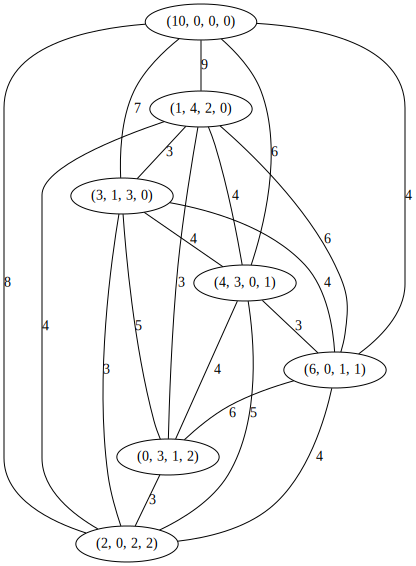

In [21]:
JupyterSplashDot(DotEliahouGraph(Factorizations(100,s)));

### The catenary degree

In addition, `DotFactorizationGraph` draws a minimum spanning tree.

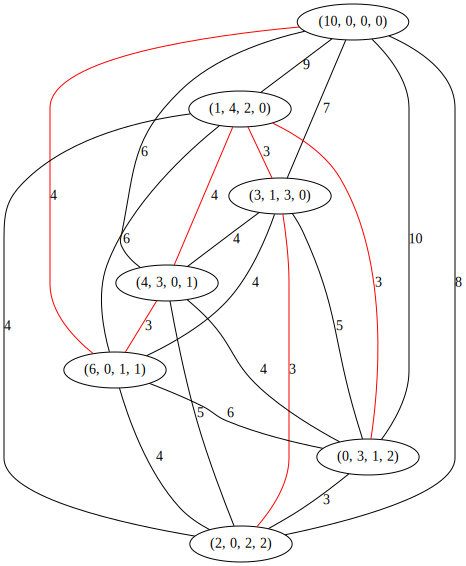

In [22]:
JupyterSplashDot(DotFactorizationGraph(Factorizations(100,s)));

In particular, this means that we can go from any factorization of $100$ in $S$ to any other factorization of the same element by using a path such that two consecutive nodes are at a distance of at most four. This is precisely the idea behind the concept of catenary degree.

Let $z$ and $z'$ be two factorizations of $s$. An $N$-chain joining $z$ and $z'$ is a sequence $z_1,\dots,z_t$ of factorizations of $s$ such that $\operatorname{d}(z_i,z_{i+1})\le N$. The catenary degree of $s$, denoted $\operatorname{c}(s)$, in the minimum $N$ such that for any two factorizations of $s$ there exists an $N$-chain connecting them.

The catenary degree of $S$ is 
$$
\operatorname{c}(S)=\sup\{ \operatorname{c}(s) : s\in S\}.
$$

This supremum is a maximum.

In [23]:
CatenaryDegree(100,s);

4

In [24]:
CatenaryDegree(s);

4

In [28]:
CatenaryDegree(200,s);

4

In [29]:
Length(Factorizations(200,s));

40

Recall that by using the minimal relations of $S$ we can find a path joining any two different factorizations of an element. Thus, it is not hard to prove that the maximum of the catenary degree of $S$ is attained at one of its Betti elements.

In [30]:
Set(BettiElements(s), b->CatenaryDegree(b,s));

[ 3, 4 ]

### The tame degree

The catenary degree measures the minimum distance needed to find paths connecting any two factorizations of an element in the semigroup in such a way that every step in the path is withing that minimum distance.

The tame degree intends to measure a radius $r$ in which for any factorization $z$ of $s\in S$, with $s-n_i\in S$, you will find another factorization $z'$ such that $\operatorname{d}(z,z')\le r$ and $z_i'\neq 0$.

Let $s\in S$ such that $s-n_i\in S$ for some $i\in\{1,\dots,e\}$. Define $\mathsf{Z}_i(s)=\{z : z\in \mathsf{Z}(s), z_i\neq 0\}$, which is nonempty as $s-n_i\in S$. Set
$$
\operatorname{t}_i(s)=\sup\{\operatorname{d}(z,\mathsf{Z}_i(s)) : z \in \mathsf{Z}(n)\},
$$
and 
$$
\operatorname{t}(s)=\max\{\operatorname{t}_i(s) : s-n_i\in S, i\in\{1,\dots,e\}\}.
$$

The tame degree of $S$ is defined as 
$$
\operatorname{t}(S)=\sup\{ \operatorname{t}(s) : s\in S\}.
$$

In [31]:
s:=NumericalSemigroup( 24, 59, 114);

<Numerical semigroup with 3 generators>

In [32]:
TameDegree(s);

29

Usually the tame degre is not attained at the Betti elements.

In [33]:
Set(BettiElements(s),b->TameDegree(b,s));

[ 11, 19 ]

It can be shown that the tame degree of $S$ is attained at an element $s\in S$ such that $s$ has a factorization in $\operatorname{Minimals}_\le (\mathsf{Z}(n_i+S))$ for some $i\in\{1,\dots,e\}$. Elements having this property are of the form $n_i+w$ with $w\in \operatorname{Ap}(S,n_j)$, more specifically, there exists $i,j\in \{1,\dots,e\}$ such that $s-n_i,s-n_j\in S$ and $s-(n_i+n_j)\not\in S$. 

For $s\in S$, the Rosales graph $G_s$ is defined as follows. The vertices of $G_s$ are the minimal generators $n_i$ such that $s-n_i\in S$, and $n_in_j$ is an edge whenever $s-(n_i+n_j)\in S$.

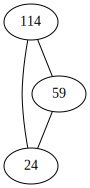

In [34]:
JupyterSplashDot(DotRosalesGraph(400,s));

In [35]:
BettiElements(s);

[ 354, 456 ]

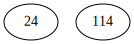

In [36]:
JupyterSplashDot(DotRosalesGraph(456,s));

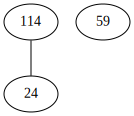

In [37]:
JupyterSplashDot(DotRosalesGraph(354,s));

The number of connected components of $G_s$ coincides with the set of $R$-classes of the set of factorizations of $s$. Thus the catenary degree is attained in an $s$ with $G_s$ not connected, and the tame degree in an $s$ with $G_s$ not complete.

### Primality

Recall that $S$ induces an order over the integers $a\le_S b$ if $b-a\in S$. If $a$ and $b$ are in $S$, then we say that $a$ divides $b$ if $b-a\in S$. In this way, minimal generators (irreducibles, atoms, primitive elements) are those not having proper divisors. A natural question arises: are there "prime" elements in a numerical semigroup. The ones to be candidates to be prime are the minimal generators of the semigroup.

Let $S$ be minimally generated by $\{n_1,\dots,n_e\}$. Consider the set $\operatorname{Minimals}_\le (\mathsf{Z}(n_i+S))$. Notice that $S\setminus(n_i+S)=\operatorname{Ap}(S,n_i)$, and so the set $\mathsf{Z}(n_i+S)=\mathbb{N^e}\setminus \mathsf{Z}(\operatorname{Ap}(S,n_i))$. Let $z \in \operatorname{Minimals}_\le (\mathsf{Z}(n_i+S))$, $z\neq e_i$. Then $n_i$ divides $\varphi_S(z)$ and cannot divide any of its "factors". Hence, $n_i$ cannot be prime.

Let $s\in S$. The $\omega$-primality of $S$, $\omega(S,s)$, is defined as the least integer $N$ such that whenever $s$ divides $a_1+\dots+a_n$ for some $a_1,\dots,a_n\in S$, then $s$ divides $a_{i_1}+\dots+a_{i_N}$ for some $\{i_1,\dots,i_N\}\subseteq \{1,\dots,n\}$. By an argument similar to the one given above,
$$
\omega(S,s)= \max \{ |z| : z\in \operatorname{Minimals}_\le (\mathsf{Z}(s+S))\}.
$$

In [38]:
s:=NumericalSemigroup(3,5,7);

<Numerical semigroup with 3 generators>

In [39]:
OmegaPrimality(10,s);

5

Observe that if $z\in \operatorname{Minimals}_\le(\mathsf{Z}(s+S))$, then $\varphi(z)=s+t$ for some $t\in S$. Let $i$ be such $z_i\neq 0$. Then $z-z_i\not\in \mathsf{Z}(s+S)$, and thus $s+t-n_i\not\in s+S$, which means that $t\in \operatorname{Ap}(S,n_i)$. This limits the search for computing $\operatorname{Minimals}_\le(\mathsf{Z}(s+S))$.

There is an alternative way to compute the set $\operatorname{Minimals}_\le(\mathsf{Z}(s+S))$. Observe that $x\in \mathsf{Z}(s+S)$ if and only if $n_1x_1+\dots+x_en_e=s+n_1t_1+\dots+n_et_e$ for some $t_1,\dots,t_e\in \mathbb{N}$. So we can solve the problem by looking at the nonnegative integer solutions (in $\mathbb{N}^{2e}$) to the equation
$$n_1x_1+\dots+x_en_e-n_1t_1-\dots-n_et_e=s$$
and then project onto the first $e$ coordinates.

The omega primality of $S$ is defined as the maximum of the omega primalities of its minimal generators.

In [40]:
OmegaPrimality(s);

4

It can be shown that 
$$
2+\max(\Delta(S))\le \operatorname{c}(S)\le \omega(S)\le \operatorname{t}(S).
$$

### Divisors

Let $s$ be an element in a numerical semigroup $S$. The set of divisors of $s$ is 
$$
\operatorname{D}(s)=\{ n\in S : s-n\in S\}.
$$

The Feng-Rao distance of $s$ is defined as 
$$
\delta_{FR}(s)=\min\{ \# \operatorname{D}(s') : s\le s', s'\in S\}.
$$

Let $c$ be the conductor of $S$ and let $g$ be its genus. It can be shown that for $s\ge 2c-1$, 
$$
\delta_{FR}(s)=s+1-2g.
$$

In [43]:
ndiv:={x,s}->Length(DivisorsOfElementInNumericalSemigroup(x,s));;
s:=NumericalSemigroup(3,5,7);;
List(s{[1..20]}, x->ndiv(x,s));

[ 1, 2, 2, 3, 2, 4, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17 ]

In [44]:
FengRaoDistance(s,1,10);

5

The generalized Feng-Rao distance is defined as 
$$
\delta_{FR}^r=\min\{\#\operatorname{D}(s_1,\dots,s_r) : s\le s_1\le \dots \le s_r, s_1,\dots,s_r\in S\},
$$
where $\operatorname{D}(s_1,\dots,s_r)=\bigcup_{i=1}^r \operatorname{D}(s_i)$.
It can be shown that for $s\ge 2c-1$, 
$$
\delta_{FR}^r(s)= s+1 -2g + E(S,r).
$$
The constant $E(S,r)$ is known as the $r$th Feng-Rao number. For $r=2$, 
$$
E(S,2)=\min\{\#\operatorname{Ap}(S,n) : r\in \{1,\dots,\operatorname{m}(S)\}\}.
$$
The definition of the Apéry set for elements not in $S$ is the same as the one given above.

In [45]:
s:=NumericalSemigroup(5,6);

<Numerical semigroup with 2 generators>

In [46]:
SmallElements(s);

[ 0, 5, 6, 10, 11, 12, 15, 16, 17, 18, 20 ]

In [47]:
AperyList(s,1);

[ 0, 5, 10, 15, 20 ]

In [48]:
Gaps(s);

[ 1, 2, 3, 4, 7, 8, 9, 13, 14, 19 ]

The cardinality of $\operatorname{Ap}(S,1)$ is the number of deserts of $S$.

In [49]:
AperyList(s,-1);

[ 0, 6, 12, 18 ]